# Analizando Datos con PyData 

* Objetivos de la Lección.
* Revisión de los DataFrame y Series en Pandas.
* SQL y Pandas.


## Básico 2: Limpieza, manipulación y transformación.

* Inspección de los Datos.
* Selección y manipulación de los datos.
* Transformación de los datos.

## Objetivos de la Lección

* Revisar aspectos de las Series y los DataFrames.
* Relación entre SQL y programación en Pandas.
* Depuración y manipulación de los datos.

## Revisión de los DataFrame y Series en Pandas

Como se mencionó en la lección 2, la relación entre Series y DataFrames(DF) es directa. Cada columna dentro de un DF es una columna. Y como es de esperar, una Series solo tienen un conjunto de índices, mientras los DF cuentan con dos.

Una de las ideas de Pandas, es poder usar las Series o los DF, de modo similar a como se pueden usar las estructuras de datos en Python. Con esto me refiero a respetar **"la idiomático" ** de Python. El siguiente código es un ejemplo:
  


In [0]:
#Se define una lista y se presenta si un elemento está o no en la lista.
a=[1,2,3,5]

print(3 in a)
print(3 not in a)

True
False


In [0]:
#Se define un diccionario y se pregunta si está en sus claves un elemento.
b={'a':1,'b':2,'c':3}

print('d' in b)

False


Los dos ejemplos anteriores son ejemplos de código estándar en Python. Tomando esta idea, lo que se hizo en Pandas fue respetar o conservar ese tipo de programación.

In [0]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

s


a    2.466857
b   -1.288897
c   -1.065179
d    0.317595
e   -0.108432
dtype: float64

In [0]:
print('e' in s)

False


In [0]:
print(1 in s.values)
print(1 in s)

False
False


Algunos conocimientos básicos respecto a las Series, serían:

* Cómo definir una serie.
* Como operar sobre una serie.


In [0]:
#Definición de una serie desde un diccionario
d = {'b' : 1, 'a' : 0, 'c' : 2}

pd.Series(d)

a    0
b    1
c    2
dtype: int64

In [0]:
#Selección de elementos de una serie.
s[0]

s[:2]

Las series cuentan con un conjunto de funciones definidas sobre ellas, entre las que se encuentran las funciones estadísticas estandar. Una de las propiedades para operar sobre las series, es similar a la operación sobre los arrays de Numpay, soportan pedirles condiciones lógicas.

In [0]:
#Se pide tomar todos los elementos que cumplen una condición
s[s > s.median()]

c   -0.270267
e    0.546955
dtype: float64

También se puede operar sobre los índices de la serie para seleccionar algunas elemetos.

In [0]:
#Operación de selección por posición
s[[4, 3, 1]]

e    0.546955
d   -1.785952
b   -1.823973
dtype: float64

Se mostró que cuentan las series con ciertas funciones (ejemplo s.mean), pero es posible que la función que necesitamos no se encuentra en Pandas, pero si en Numpy. Así que se puede aplicar la función directamente y solo afecta los valores.

In [0]:
#Aplicación de una función de numpy sobre los valores de la serie
np.log(s+10)

a    2.180639
b    2.101206
c    2.275186
d    2.105846
e    2.355837
dtype: float64

Como objetos en Python, también la series soportan operciones entre ellas.

In [0]:
#Suma de dos series
s+s

a   -2.296082
b   -3.647946
c   -0.540534
d   -3.571903
e    1.093910
dtype: float64

In [0]:
#Multiplicación de la serie
s*2

a   -2.296082
b   -3.647946
c   -0.540534
d   -3.571903
e    1.093910
dtype: float64

Como se mencionó en la lección 2 se mencionó la relación entre los elementos de Pandas y Numpy, el siguiente código es un ejemplo de operación sobre las series vs sobre el arreglo de la serie.

In [0]:
#Se opera sobre el arreglo
s.values[s>s.values.mean()]



array([-0.27026716,  0.54695501])

In [0]:
#Se realiza la misma operación, pero sobre la serie.
s[s>s.mean()]

c   -0.270267
e    0.546955
dtype: float64

En la lección 2, se mencionó que todos los elementos de la serie, deben de ser homogéneos. Es decir, deben de ser del mismo tipo. ¿Qué sucede con el siguiente ejemplo?

In [0]:
#Se define la serie
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Se observa que el tipo de dato es np.object. Esto implica que todos los elementos de la serie son del mismo tipo, pero si se revisa cada elemento de la serie se observará que cada elemento tiene un tipo diferente.

In [0]:
for element in s:
  print(type(element))

<class 'int'>
<class 'str'>
<class 'float'>
<class 'int'>
<class 'str'>


Conclusión, la serie pese a ser definida con elementos de tipo diferente para Pandas es intepretado como un mismo tipo (para ser homogeneo) y tiene por lo cual las propiedades del tipo que se definió. Además, el dato relevante sobre las series es que por estructura cuenta con un conjunto de índices y de valores. 

### DataFrames

El siguiente ejemplo define un DF desde un diccionario.

In [0]:
#Definición del diccionario
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [0]:
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [0]:
#Definción del DF
df = pd.DataFrame(d)
 df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Pero no es el único modo de definir un DF.

In [0]:
#Definicion de un DF desde un diccionario con listas.
d = {'one' : [1., 2., 3., 4.],'two' : [4., 3., 2., 1.]}

In [0]:
#Definción del DF
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [0]:
#Definición desde una lista de Diccionarios
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [0]:
#Definicióndesde un diccionario con keys como tuplas
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
                  ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
                  ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
                  ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
                  ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})
    

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

Como se comentó en la lección 2, se puede hacer elección de columnas tanto por posición (número de columna) como por localización (nombre), debido a que los valores de los DataFrame son arreglos en Numpy, se operan con las columnas con operaciones vectorizadas.

In [0]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [0]:
#Definición de una nueva columna 
df['three'] = df['one'] * df['two']

df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [0]:
#Definición de una nueva columna pero desde una condicion lógica
df['flag'] = df['one'] > 2

df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [0]:
#Selección de filas de una columna y definición de una columna
df['one_trunc'] = df['one'][:2]
df

,one,two,three,flag,one_trunc
a,1.0,1.0,1.0,False,1.0
b,2.0,2.0,4.0,False,2.0
c,3.0,3.0,9.0,True,NaN
d,NaN,4.0,NaN,False,NaN


Los ejemplos anteriores mostraron que cuando se crea una nueva columna, esta se agrega al final del DF. Pero puede presentarse la situación donde necesitamos agregar una columan en alguna posición intermedia. El siguiente código es un ejemplo para hacer esa operación.

In [0]:
#Se inserta una columna
df.insert(1, 'bar', df['one'])
df 

,one,bar,two,three,flag,one_trunc
a,1.0,1.0,1.0,1.0,False,1.0
b,2.0,2.0,2.0,4.0,False,2.0
c,3.0,3.0,3.0,9.0,True,NaN
d,NaN,NaN,4.0,NaN,False,NaN


Los valores booleanos y los NaN cuando se opera con el DF respetan la operación como elementos de Numpy.

In [0]:
#Operación vectorizda sobre el DF
df*5

,one,bar,two,three,flag,one_trunc
a,5.0,5.0,5.0,5.0,0,5.0
b,10.0,10.0,10.0,20.0,0,10.0
c,15.0,15.0,15.0,45.0,5,NaN
d,NaN,NaN,20.0,NaN,0,NaN


Similar al ejemplo en las Series, los DF cuantan con funciones definidas sobre ellos, pero si se necesita alguna función en Numpy puede ser aplicada sobre todo el DF.

In [0]:
np.exp(df.drop(labels=['flag'],axis=1))

,one,bar,two,three,one_trunc
a,2.718282,2.718282,2.718282,2.718282,2.718282
b,7.389056,7.389056,7.389056,54.598150,7.389056
c,20.085537,20.085537,20.085537,8103.083928,NaN
d,NaN,NaN,54.598150,NaN,NaN


Los ejemplos anteriores son ejemplos sencillos sobre Series y DataFrame, pero en la mayoría de situaciones tanto las series como los DF serán creados desde un archivo o fuente donde tomaremos datos. Los siguientes ejemplos son pequeñas muestras del trabajo normal con la creación de DF.

In [0]:
#Se define la ruta desde donde se cargará la tabla
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

# Los datos se cargan usando un tipo de lectura a un DF.
from_url = pd.read_table(url, sep='\t')
from_url.head(3)

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925


En muchos casos los datos que se obtienen en internet desde algún sistema vienen en formatos JSON, estos pueden ser preprocesados para posteriormente cargarlos en un DF de manera más tradicional. Pero debido al uso frecuente de Pandas, se han desarrollado funciones para ayudar a facilidar el tratamiento y carga de datos. El siguiente ejemplo muestra como procesar los datos que son obtenidos en formato JSON.

In [0]:
#Se definen las biblitecas que se necesitarán
import requests
import json

#Se define la ruta
url = "http://mesonet.agron.iastate.edu/geojson/network.php?network={}"
#Se piden los datos
r = requests.get(url.format("AWOS"))
js = r.json()

Visualizamos el formato del los datos.

In [0]:
js

{'count': 46,
 'features': [{'geometry': {'coordinates': [-94.2724, 43.0796],
    'type': 'Point'},
   'id': 'AXA',
   'properties': {'climate_site': 'IA0133',
    'country': 'US',
    'county': 'Kossuth',
    'elevation': 368.8,
    'ncdc81': 'USC00130133',
    'sid': 'AXA',
    'sname': 'ALGONA',
    'state': 'IA',
    'tzname': 'America/Chicago',
    'ugc_county': 'IAC109',
    'ugc_zone': 'IAZ005',
    'wfo': 'DMX'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-93.5695, 41.6878], 'type': 'Point'},
   'id': 'IKV',
   'properties': {'climate_site': 'IA0241',
    'country': 'US',
    'county': 'Polk',
    'elevation': 270.7,
    'ncdc81': 'USC00130241',
    'sid': 'IKV',
    'sname': 'ANKENY',
    'state': 'IA',
    'tzname': 'America/Chicago',
    'ugc_county': 'IAC153',
    'ugc_zone': 'IAZ060',
    'wfo': 'DMX'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-95.0465, 41.4059], 'type': 'Point'},
   'id': 'AIO',
   'properties': {'climate_site': 'IA0364',
    'co

In [0]:
#Se eleige algunos de los datos
js['features'][:2]

[{'geometry': {'coordinates': [-94.2724, 43.0796], 'type': 'Point'},
  'id': 'AXA',
  'properties': {'climate_site': 'IA0133',
   'country': 'US',
   'county': 'Kossuth',
   'elevation': 368.8,
   'ncdc81': 'USC00130133',
   'sid': 'AXA',
   'sname': 'ALGONA',
   'state': 'IA',
   'tzname': 'America/Chicago',
   'ugc_county': 'IAC109',
   'ugc_zone': 'IAZ005',
   'wfo': 'DMX'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-93.5695, 41.6878], 'type': 'Point'},
  'id': 'IKV',
  'properties': {'climate_site': 'IA0241',
   'country': 'US',
   'county': 'Polk',
   'elevation': 270.7,
   'ncdc81': 'USC00130241',
   'sid': 'IKV',
   'sname': 'ANKENY',
   'state': 'IA',
   'tzname': 'America/Chicago',
   'ugc_county': 'IAC153',
   'ugc_zone': 'IAZ060',
   'wfo': 'DMX'},
  'type': 'Feature'}]

Si se carga la información en un DF, se logra tener algo pero observamos el formato.

In [0]:
#visualización de los datos.
pd.DataFrame(js['features']).head()

,geometry,id,properties,type
0,"{'type': 'Point', 'coordinates': [-94.2724, 43...",AXA,"{'elevation': 368.8, 'sname': 'ALGONA', 'state...",Feature
1,"{'type': 'Point', 'coordinates': [-93.5695, 41...",IKV,"{'elevation': 270.7, 'sname': 'ANKENY', 'state...",Feature
2,"{'type': 'Point', 'coordinates': [-95.0465, 41...",AIO,"{'elevation': 351.7, 'sname': 'ATLANTIC', 'sta...",Feature
3,"{'type': 'Point', 'coordinates': [-94.9204, 41...",ADU,"{'elevation': 399.3, 'sname': 'AUDUBON', 'stat...",Feature
4,"{'type': 'Point', 'coordinates': [-93.8486, 42...",BNW,"{'elevation': 349.3, 'sname': 'BOONE MUNI', 's...",Feature


El ejemplo siguiente es como se pueden usar herramientas que tienen Pandas y que facilidad el trabajo al momento de crear un DataFrame.

In [0]:
stations = pd.io.json.json_normalize(js['features'])

In [0]:
stations.head()

,geometry.coordinates,geometry.type,id,properties.climate_site,properties.country,properties.county,properties.elevation,properties.ncdc81,properties.sid,properties.sname,properties.state,properties.tzname,properties.ugc_county,properties.ugc_zone,properties.wfo,type
0,"[-94.2724, 43.0796]",Point,AXA,IA0133,US,Kossuth,368.8,USC00130133,AXA,ALGONA,IA,America/Chicago,IAC109,IAZ005,DMX,Feature
1,"[-93.5695, 41.6878]",Point,IKV,IA0241,US,Polk,270.7,USC00130241,IKV,ANKENY,IA,America/Chicago,IAC153,IAZ060,DMX,Feature
2,"[-95.0465, 41.4059]",Point,AIO,IA0364,US,Cass,351.7,USC00130364,AIO,ATLANTIC,IA,America/Chicago,IAC029,IAZ070,DMX,Feature
3,"[-94.9204, 41.6994]",Point,ADU,IA0385,US,Audubon,399.3,USC00130385,ADU,AUDUBON,IA,America/Chicago,IAC009,IAZ057,DMX,Feature
4,"[-93.8486, 42.0486]",Point,BNW,IA0807,US,Boone,349.3,USC00130807,BNW,BOONE MUNI,IA,America/Chicago,IAC015,IAZ047,DMX,Feature


### ¿Siempre hacemos una transformación a la vez?



In [0]:
from_url.head()

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925
3,4,Roast Beef,Al&rsquo;s Deli,"The Francophile brothers behind this deli, whi...",$9.40.,914 Noyes St.,Evanston,NaN,alsdeli.net,"914 Noyes St., Evanston","914 Noyes Street, Evanston, IL 60201, USA",42.058442,-87.684425
4,5,PB&amp;L,Publican Qualty Meats,"When this place opened in February, it quickly...",$10,825 W. Fulton Mkt.,Chicago,312-445-8977,publicanqualitymeats.com,"825 W. Fulton Mkt., Chicago","825 West Fulton Market, Chicago, IL 60607, USA",41.886637,-87.648553


In [0]:
#Codigo versión 1

Phone=from_url['phone']
Phone_dropna=Phone.dropna()
Phone_Numbers=Phone_dropna.apply(lambda x: str(x).split('-')[0])
Phone_Numbers.max()

'773'

In [0]:
#Versión 2
from_url['phone'].dropna().apply(lambda x: str(x).split('-')[0]).max()

'773'

In [0]:
#Version 3
from_url['phone'].dropna()\
                 .apply(lambda x: str(x)\
                 .split('-')[0])\
                 .max()

El ejemplo anterior muestra que se pueden hacer cadenas de operaciones o transformaciones sobre los DF, esto permite definir un tipo de programación en Pandas. Esto puede ser pensado que es programación "Declarativa".


Limpiamos el entorno para hacer los siguientes ejemplos.

In [0]:
%clear

In [0]:
%reset -f

In [0]:
%whos

Interactive namespace is empty.


## SQL y Pandas

El lenguaje estandar para procesar datos es SQL (Structured Query Language), este es un lenguaje de dominio especifico que resulta adecuado para trabajar con bases de datos relacionales. Pero de igual forma, se han desarrollado herramientas para usar el mismo tipo de lenguage (SQL) en bases de datos de estructura diferente a las relacionales.

A primera vista la sintaxis de SQL vs Pandas es totalmente diferente, pero se pueden recuperar los resultados haciendo uso de la condiciones lógicas y la manipulacion sobre los DF.

Los siguientes códigos son ejemplos sencillos de operaciones elementales en SQL dentro de las operaciones de Pandas.

In [0]:
#Se cargan las bibliotecas y datos necesarios para los ejemplos.
import pandas as pd
import numpy as np


url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

# fetch the text from the URL and read it into a DataFrame
data = pd.read_table(url, sep='\t')
data.head(3)

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925


In [0]:
#Breve revisión de los datos
data.city.value_counts()

Chicago          53
Elmhurst          2
Bolingbrook       1
Lake Forest       1
Orland Hills      1
Evanston          1
Highland Park     1
Oak Park          1
Name: city, dtype: int64

In [0]:
#Exploración minima de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
rank                 61 non-null int64
sandwich             61 non-null object
restaurant           61 non-null object
description          61 non-null object
price                61 non-null object
address              61 non-null object
city                 61 non-null object
phone                50 non-null object
website              58 non-null object
full_address         61 non-null object
formatted_address    61 non-null object
lat                  61 non-null float64
lng                  61 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 6.3+ KB



SQL 1

Lo más básico en un query es seleccionar columans y visualizar algunas de las filas.

~~~sql
SELECT restaurant, price, city,phone
FROM data
LIMIT 5;
~~~


In [0]:
#SQL 1 en Pandas
data[['restaurant', 'price', 'city','phone']].head(5)

,restaurant,price,city,phone
0,Old Oak Tap,$10,Chicago,773-772-0406
1,Au Cheval,$9,Chicago,312-929-4580
2,Xoco,$9.50.,Chicago,312-334-3688
3,Al&rsquo;s Deli,$9.40.,Evanston,NaN
4,Publican Qualty Meats,$10,Chicago,312-445-8977


In [0]:
#SQL 1 en Pandas
data.loc[:4,['restaurant', 'price', 'city','phone']]

,restaurant,price,city,phone
0,Old Oak Tap,$10,Chicago,773-772-0406
1,Au Cheval,$9,Chicago,312-929-4580
2,Xoco,$9.50.,Chicago,312-334-3688
3,Al&rsquo;s Deli,$9.40.,Evanston,NaN
4,Publican Qualty Meats,$10,Chicago,312-445-8977


SQL 2

La siguiente operacion básica en SQL es seleccionar columnas y pedir que estas cumplan cierta condición o restricción.

~~~sql
SELECT *
FROM data
WHERE city = 'Elmhurst';
~~~

In [0]:
#SQL 2 en Pandas
data[data['city']=='Elmhurst']

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
50,40,Tuscan Chicken,Rosalia&rsquo;s Tuscan Chicken,When a boneless chicken breast is dripping wit...,$6,241 N. York Rd.,Elmhurst,NaN,rosaliasdeli.com,"241 N. York Rd., Elmhurst","241 North York Street, Elmhurst, IL 60126, USA",41.904940,-87.939853
58,48,Beef Curry,Zenwich,Proof positive that sandwiches have surpassed ...,$7.50.,416 N. York St.,Elmhurst,NaN,eatmyzenwich.com,"416 N. York St., Elmhurst","416 North York Street, Elmhurst, IL 60126, USA",41.910661,-87.939928


In [0]:
#SQL 2 en Pandas
data[data.city=='Elmhurst']

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
50,40,Tuscan Chicken,Rosalia&rsquo;s Tuscan Chicken,When a boneless chicken breast is dripping wit...,$6,241 N. York Rd.,Elmhurst,NaN,rosaliasdeli.com,"241 N. York Rd., Elmhurst","241 North York Street, Elmhurst, IL 60126, USA",41.904940,-87.939853
58,48,Beef Curry,Zenwich,Proof positive that sandwiches have surpassed ...,$7.50.,416 N. York St.,Elmhurst,NaN,eatmyzenwich.com,"416 N. York St., Elmhurst","416 North York Street, Elmhurst, IL 60126, USA",41.910661,-87.939928


In [0]:
#SQL 2 en pandas
data.loc[data.city.isin(['Elmhurst']),:]

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
50,40,Tuscan Chicken,Rosalia&rsquo;s Tuscan Chicken,When a boneless chicken breast is dripping wit...,$6,241 N. York Rd.,Elmhurst,NaN,rosaliasdeli.com,"241 N. York Rd., Elmhurst","241 North York Street, Elmhurst, IL 60126, USA",41.904940,-87.939853
58,48,Beef Curry,Zenwich,Proof positive that sandwiches have surpassed ...,$7.50.,416 N. York St.,Elmhurst,NaN,eatmyzenwich.com,"416 N. York St., Elmhurst","416 North York Street, Elmhurst, IL 60126, USA",41.910661,-87.939928


SQL

Otro operación estandar es pedir elegir las columnas pero que se cumplan alguna de las operaciones básicas **and, or, not**.
~~~sql
SELECT *
FROM data
WHERE city = 'Chicago' AND price <= 8.00;
~~~

In [0]:
#SQL 3 en Pandas.
#Primero procesamos la variable price para poder operar sobre ella.
data['price']=data.price.apply(lambda x: x.replace('$','').split('.')[0]).astype(float)

In [0]:
data.head()

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,10.0,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,9.0,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,9.0,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925
3,4,Roast Beef,Al&rsquo;s Deli,"The Francophile brothers behind this deli, whi...",9.0,914 Noyes St.,Evanston,NaN,alsdeli.net,"914 Noyes St., Evanston","914 Noyes Street, Evanston, IL 60201, USA",42.058442,-87.684425
4,5,PB&amp;L,Publican Qualty Meats,"When this place opened in February, it quickly...",10.0,825 W. Fulton Mkt.,Chicago,312-445-8977,publicanqualitymeats.com,"825 W. Fulton Mkt., Chicago","825 West Fulton Market, Chicago, IL 60607, USA",41.886637,-87.648553


In [0]:
#SQL 3 en Pandas
data[(data.city=='Chicago') & (data.price<7.0) ]

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
11,12,Breaded Steak,Ricobene&rsquo;s,This is what put Ricobene&rsquo;s on the map: ...,5.0,252 W. 26th Street,Chicago,(312) 225-5555,ricobenespizza.com,"252 W. 26th Street, Chicago","252 West 26th Street, Chicago, IL 60616, USA",41.845754,-87.633895
13,12,Breaded Steak,Ricobene&rsquo;s,This is what put Ricobene&rsquo;s on the map: ...,5.0,5160 S. Pulaski Road,Chicago,(773) 284-2400,ricobenespizza.com,"5160 S. Pulaski Road, Chicago","5160 South Pulaski Road, Chicago, IL 60632, USA",41.798956,-87.723434
18,16,Meatball Sub,Bari,"No condiments, no fuss, just saucy meatballs (...",4.0,1120 W. Grand Ave.,Chicago,312-666-0730,bariitaliansubs.com,"1120 W. Grand Ave., Chicago","1120 West Grand Avenue, Chicago, IL 60642, USA",41.891213,-87.655534
21,19,Falafel,Old Jerusalem,The fritters of mashed chickpeas are perfectly...,6.0,1411 N. Wells St.,Chicago,312-944-0459,oldjerusalemchicago.com,"1411 N. Wells St., Chicago","1411 North Wells Street, Chicago, IL 60610, USA",41.908000,-87.634157
23,21,Chicken Schnitzel,Olga&rsquo;s Delicatessen,"A no-frills thrill, the schnitzel is a classic...",5.0,3209 W. Irving Park Rd.,Chicago,773-539-8038,NaN,"3209 W. Irving Park Rd., Chicago","3209 West Irving Park Road, Chicago, IL 60618,...",41.953806,-87.708466
24,22,Shawarma,Dawali Mediterranean Kitchen,Dawali&rsquo;s filling shawarma escapes a comm...,6.0,1625 N Halsted St.,Chicago,(312) 944-5800,dawalikitchen.com,"1625 N Halsted St., Chicago","1625 North Halsted Street, Chicago, IL 60614, USA",41.911714,-87.648218
25,22,Shawarma,Dawali Mediterranean Kitchen,Dawali&rsquo;s filling shawarma escapes a comm...,6.0,4911 N Kedzie Ave,Chicago,(773) 267-4222,dawalikitchen.com,"4911 N Kedzie Ave, Chicago","4911 North Kedzie Avenue, Chicago, IL 60625, USA",41.970782,-87.708503
27,24,Vegetarian Panino,La Pane,"La Pane might be known for pizza, but it offer...",5.0,2954 W. Irving Park Rd.,Chicago,773-539-5321,lapanechicago.com,"2954 W. Irving Park Rd., Chicago","2954 West Irving Park Road, Chicago, IL 60618,...",41.954024,-87.702521
53,43,"Oat Bread, Pecan Butter, and Fruit Jam",Elaine&rsquo;s Coffee Call,The chalkboard menu is ambiguous about whether...,6.0,1816 N. Clark St.,Chicago,NaN,jdvhotels.com/hotels/chicago/lincoln,"1816 N. Clark St., Chicago","1816 North Clark Street, Chicago, IL 60614, USA",41.915304,-87.634502
55,45,Cubano,Cafecito,"The success of this sandwich, a Cuban traditio...",5.0,26 E. Congress Pkwy.,Chicago,312-922-2233,cafecitochicago.com,"26 E. Congress Pkwy., Chicago","26 East Congress Parkway, Chicago, IL 60605, USA",41.875804,-87.626366


In [0]:
#SQL 3 en Pandas
data.loc[(data.city=='Chicago') & (data.price<7.0),: ]

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
11,12,Breaded Steak,Ricobene&rsquo;s,This is what put Ricobene&rsquo;s on the map: ...,5.0,252 W. 26th Street,Chicago,(312) 225-5555,ricobenespizza.com,"252 W. 26th Street, Chicago","252 West 26th Street, Chicago, IL 60616, USA",41.845754,-87.633895
13,12,Breaded Steak,Ricobene&rsquo;s,This is what put Ricobene&rsquo;s on the map: ...,5.0,5160 S. Pulaski Road,Chicago,(773) 284-2400,ricobenespizza.com,"5160 S. Pulaski Road, Chicago","5160 South Pulaski Road, Chicago, IL 60632, USA",41.798956,-87.723434
18,16,Meatball Sub,Bari,"No condiments, no fuss, just saucy meatballs (...",4.0,1120 W. Grand Ave.,Chicago,312-666-0730,bariitaliansubs.com,"1120 W. Grand Ave., Chicago","1120 West Grand Avenue, Chicago, IL 60642, USA",41.891213,-87.655534
21,19,Falafel,Old Jerusalem,The fritters of mashed chickpeas are perfectly...,6.0,1411 N. Wells St.,Chicago,312-944-0459,oldjerusalemchicago.com,"1411 N. Wells St., Chicago","1411 North Wells Street, Chicago, IL 60610, USA",41.908000,-87.634157
23,21,Chicken Schnitzel,Olga&rsquo;s Delicatessen,"A no-frills thrill, the schnitzel is a classic...",5.0,3209 W. Irving Park Rd.,Chicago,773-539-8038,NaN,"3209 W. Irving Park Rd., Chicago","3209 West Irving Park Road, Chicago, IL 60618,...",41.953806,-87.708466
24,22,Shawarma,Dawali Mediterranean Kitchen,Dawali&rsquo;s filling shawarma escapes a comm...,6.0,1625 N Halsted St.,Chicago,(312) 944-5800,dawalikitchen.com,"1625 N Halsted St., Chicago","1625 North Halsted Street, Chicago, IL 60614, USA",41.911714,-87.648218
25,22,Shawarma,Dawali Mediterranean Kitchen,Dawali&rsquo;s filling shawarma escapes a comm...,6.0,4911 N Kedzie Ave,Chicago,(773) 267-4222,dawalikitchen.com,"4911 N Kedzie Ave, Chicago","4911 North Kedzie Avenue, Chicago, IL 60625, USA",41.970782,-87.708503
27,24,Vegetarian Panino,La Pane,"La Pane might be known for pizza, but it offer...",5.0,2954 W. Irving Park Rd.,Chicago,773-539-5321,lapanechicago.com,"2954 W. Irving Park Rd., Chicago","2954 West Irving Park Road, Chicago, IL 60618,...",41.954024,-87.702521
53,43,"Oat Bread, Pecan Butter, and Fruit Jam",Elaine&rsquo;s Coffee Call,The chalkboard menu is ambiguous about whether...,6.0,1816 N. Clark St.,Chicago,NaN,jdvhotels.com/hotels/chicago/lincoln,"1816 N. Clark St., Chicago","1816 North Clark Street, Chicago, IL 60614, USA",41.915304,-87.634502
55,45,Cubano,Cafecito,"The success of this sandwich, a Cuban traditio...",5.0,26 E. Congress Pkwy.,Chicago,312-922-2233,cafecitochicago.com,"26 E. Congress Pkwy., Chicago","26 East Congress Parkway, Chicago, IL 60605, USA",41.875804,-87.626366


In [0]:
#SQL 3 en Pandas
data.query('city=="Chicago" and price<7.0')

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
11,12,Breaded Steak,Ricobene&rsquo;s,This is what put Ricobene&rsquo;s on the map: ...,5.0,252 W. 26th Street,Chicago,(312) 225-5555,ricobenespizza.com,"252 W. 26th Street, Chicago","252 West 26th Street, Chicago, IL 60616, USA",41.845754,-87.633895
13,12,Breaded Steak,Ricobene&rsquo;s,This is what put Ricobene&rsquo;s on the map: ...,5.0,5160 S. Pulaski Road,Chicago,(773) 284-2400,ricobenespizza.com,"5160 S. Pulaski Road, Chicago","5160 South Pulaski Road, Chicago, IL 60632, USA",41.798956,-87.723434
18,16,Meatball Sub,Bari,"No condiments, no fuss, just saucy meatballs (...",4.0,1120 W. Grand Ave.,Chicago,312-666-0730,bariitaliansubs.com,"1120 W. Grand Ave., Chicago","1120 West Grand Avenue, Chicago, IL 60642, USA",41.891213,-87.655534
21,19,Falafel,Old Jerusalem,The fritters of mashed chickpeas are perfectly...,6.0,1411 N. Wells St.,Chicago,312-944-0459,oldjerusalemchicago.com,"1411 N. Wells St., Chicago","1411 North Wells Street, Chicago, IL 60610, USA",41.908000,-87.634157
23,21,Chicken Schnitzel,Olga&rsquo;s Delicatessen,"A no-frills thrill, the schnitzel is a classic...",5.0,3209 W. Irving Park Rd.,Chicago,773-539-8038,NaN,"3209 W. Irving Park Rd., Chicago","3209 West Irving Park Road, Chicago, IL 60618,...",41.953806,-87.708466
24,22,Shawarma,Dawali Mediterranean Kitchen,Dawali&rsquo;s filling shawarma escapes a comm...,6.0,1625 N Halsted St.,Chicago,(312) 944-5800,dawalikitchen.com,"1625 N Halsted St., Chicago","1625 North Halsted Street, Chicago, IL 60614, USA",41.911714,-87.648218
25,22,Shawarma,Dawali Mediterranean Kitchen,Dawali&rsquo;s filling shawarma escapes a comm...,6.0,4911 N Kedzie Ave,Chicago,(773) 267-4222,dawalikitchen.com,"4911 N Kedzie Ave, Chicago","4911 North Kedzie Avenue, Chicago, IL 60625, USA",41.970782,-87.708503
27,24,Vegetarian Panino,La Pane,"La Pane might be known for pizza, but it offer...",5.0,2954 W. Irving Park Rd.,Chicago,773-539-5321,lapanechicago.com,"2954 W. Irving Park Rd., Chicago","2954 West Irving Park Road, Chicago, IL 60618,...",41.954024,-87.702521
53,43,"Oat Bread, Pecan Butter, and Fruit Jam",Elaine&rsquo;s Coffee Call,The chalkboard menu is ambiguous about whether...,6.0,1816 N. Clark St.,Chicago,NaN,jdvhotels.com/hotels/chicago/lincoln,"1816 N. Clark St., Chicago","1816 North Clark Street, Chicago, IL 60614, USA",41.915304,-87.634502
55,45,Cubano,Cafecito,"The success of this sandwich, a Cuban traditio...",5.0,26 E. Congress Pkwy.,Chicago,312-922-2233,cafecitochicago.com,"26 E. Congress Pkwy., Chicago","26 East Congress Parkway, Chicago, IL 60605, USA",41.875804,-87.626366


SQL 4

Este es otro ejemplo, de usar un conector lógico.
~~~sql
SELECT *
FROM data
WHERE rank <= 10 OR price > 10;
~~~


In [0]:
#Cuál sería la versión en Pandas?
data?

SQL 5

Por último otras de las operaciones básicas en SQL es operar sobre los NULL , que son los Missin Values en Pandas.

~~~sql
SELECT *
FROM frame
WHERE col2 IS NULL;
~~~

In [0]:
#Se define un DF para el ejemplo
frame = pd.DataFrame({'col1': ['A', 'B', np.NaN, 'C', 'D'],'col2': ['F', np.NaN, 'G', 'H', 'I']})
   

In [0]:
#SQL 5 en Pandas
frame[frame['col2'].isna()]

SQL 6

Es otro ejemplo de trabajar con los NULL, pero usando otro conector lógico.

~~~sql
SELECT *
FROM frame
WHERE col1 IS NOT NULL;
~~~

In [0]:
#SQL 6 en Pandas.
frame[frame['col1'].notna()]

Los ejemplos anteriores es una primera parte de la relación de SQL y Pandas, en cieto sentido el modo de procesar los DF es considerado un tipo moderno de operaciones en SQL. Pero es fundamental aprender SQL y su lógica de programación ya que es un estandar en todas las bases de datos.

Nota: En los ejemplos faltan algunos tipos de Queries estandar en SQL, los cuales requieren operaciones sobre varias tablas (joins), estas no se presentan en esta sección, pero si en las siguientes.

## Básico 2: Limpieza, manipulación y transformación.

Considerando el caso estandar, para trabajar en Pandas se contará con un set de datos en algún formato o una conexión alguna base de datos. Lo mínimo necesario es saber cargar la información, seleccionar columnas (o filas) y transformar algunas columnas si es requerido.

El tema de limpieza de datos, es todo un campo de trabajo debido a que no solo implica el detectar errores en los datos, sino tener una práctica adecuada para su tratamiento. Esta parte puede ser la que más tiempo requiere en algun proyecto tanto de Analisis de datos como de contrucción de modelos. Pese a que Pandas cuanta con herramientas para su trabajo, el tema es mucho más complejo de lo que parece.

La manipulación de un DF, como ya se ha mencionado queda en tres tipos de manipulaciones: sobre columas, filas o en los valores. Cuando se opera sobre los valores se puede enteder esto como una transformación de los datos. 

Referencias :

* [Knn para imputar datos.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4959387/)
* [RandomForest para imputar datos](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3939843/)
* [Notas de Andrew Gelman sobre imputación de datos.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3939843/)
* [Spectral Regularization Algorithms for Learning Large Incomplete Matrices by Mazumder et. al.]()
* [Missing value estimation methods for DNA microarrays by Troyanskaya et. al.]()
* [Exact Matrix Completion via Convex Optimization by Emmanuel Candes and Benjamin Recht using cvxpy. Too slow for large matrices.]()
* [Matrix Completion and Low-Rank SVD via Fast Alternating Least Squares.]()



*Los siguientes datos estarán disponibles en este notebook al momento de hacer los ejemplos, más adelante actualizo el notebook para que puedan usar esta muestra de datos desde otra fuente.*

*Los datos pueden ser descargados desde el siguiente link:*
[Data](https://www.kaggle.com/c/home-credit-default-risk/data)

In [0]:
#Se cargan los datos  

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("application_train.csv.zip")
data.head(3)  

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
plt.rcParams['figure.figsize'] = 15, 10

In [0]:
#Se explora el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [0]:
#Se revisan los Missing Values del DataFrame
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [0]:
#Se exploran las variables que tienen más de
# un missing value
data.loc[:,(data.isna()==True).sum()>0].isnull().sum() \
    .sort_values().to_frame()

,0
DAYS_LAST_PHONE_CHANGE,1
CNT_FAM_MEMBERS,2
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
EXT_SOURCE_2,660
DEF_60_CNT_SOCIAL_CIRCLE,1021
OBS_60_CNT_SOCIAL_CIRCLE,1021
DEF_30_CNT_SOCIAL_CIRCLE,1021
OBS_30_CNT_SOCIAL_CIRCLE,1021
NAME_TYPE_SUITE,1292


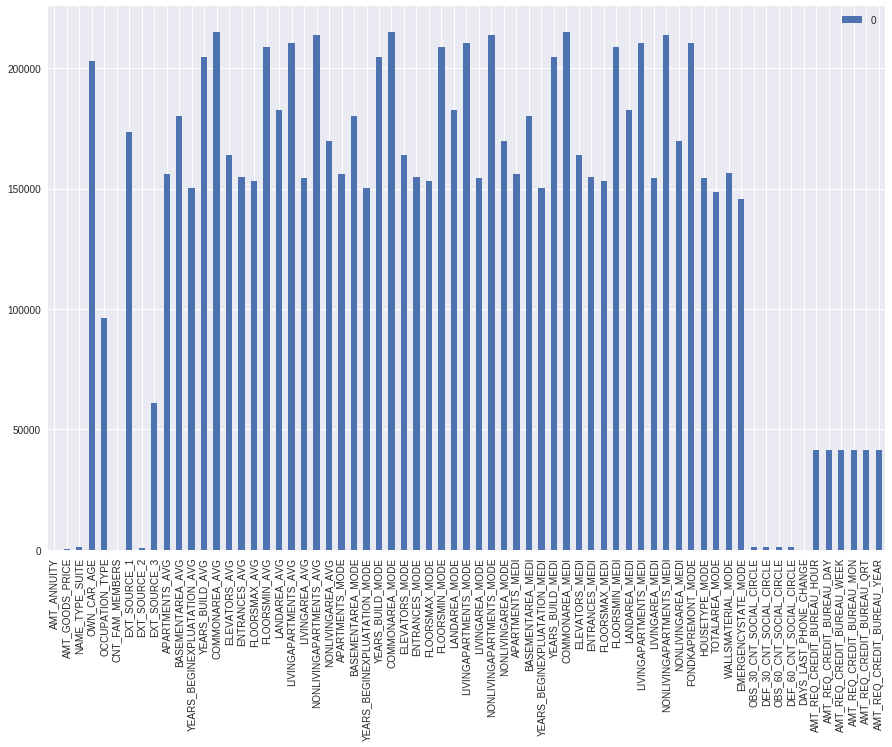

In [0]:
#Se hace una gráfica de barras para conocer los Missing
#values
data.loc[:,(data.isna()==True).sum()>0].isnull().sum() \
    .to_frame().plot(kind='bar')


In [0]:
#Se puede explorar la estadística 
#de los missing values
data.isnull().sum(axis=1).describe()

count    307511.000000
mean         29.763049
std          20.919345
min           0.000000
25%           5.000000
50%          36.000000
75%          49.000000
max          61.000000
dtype: float64

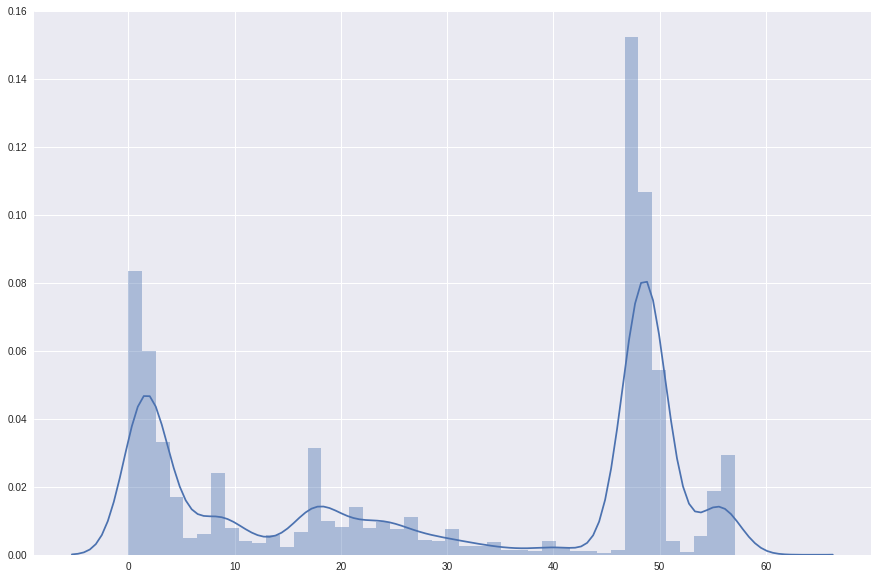

In [0]:
#Gráfica de los missing Values
#sobre todas las columnas
sns.distplot(data.isnull().sum(axis=1))

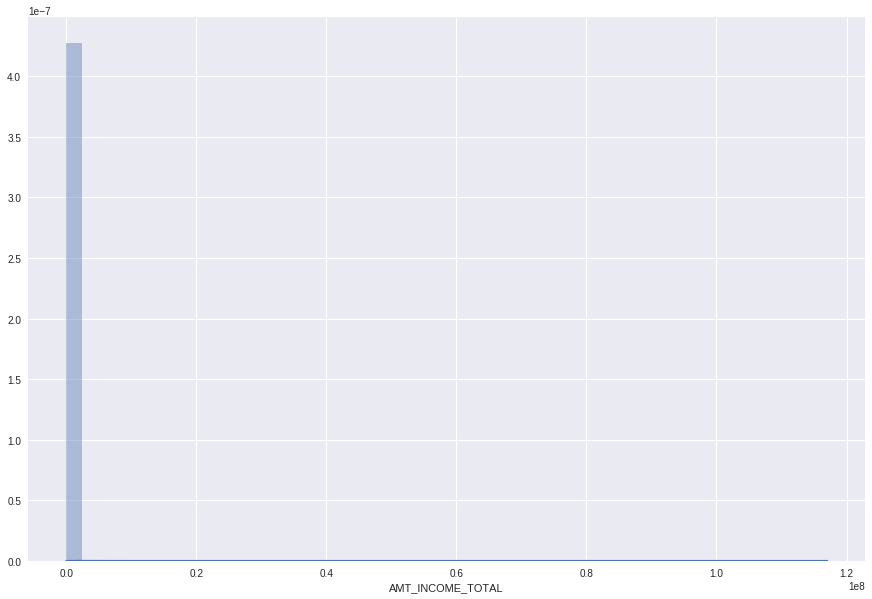

In [0]:
#Exploración de la densidad de una de las variables
sns.distplot(data.AMT_INCOME_TOTAL)

## Funciones Lambda

El la lección 1 se habló de funciones en Python, en como se definen y la idea detras de ello. Pero existen otro tipo de funciones que lo que tienen como funcion principal es actuar como funcion pero no es solo usada donde se define.

In [0]:
#Se define una función
def Log1(x):
  return np.log1p(x)

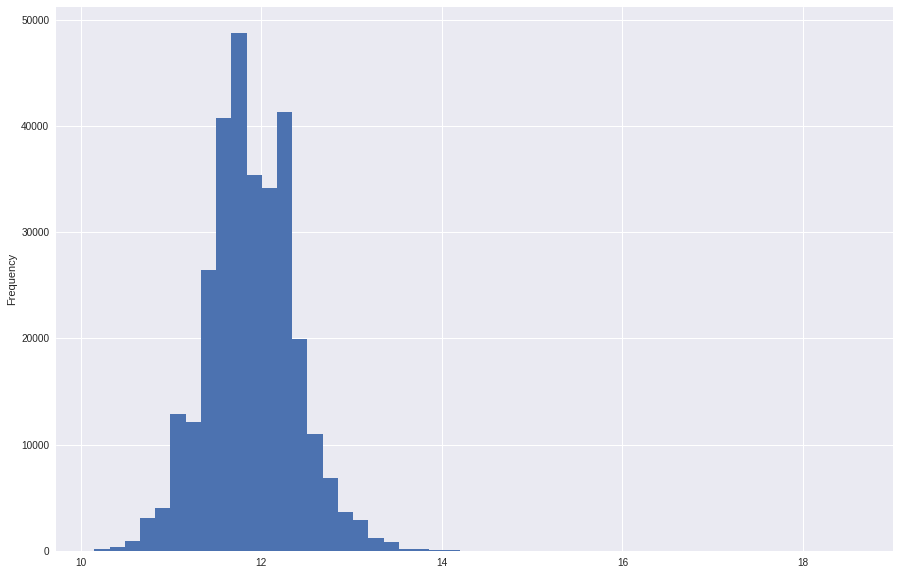

In [0]:
data.AMT_INCOME_TOTAL.apply(Log1).plot.hist(bins=50)

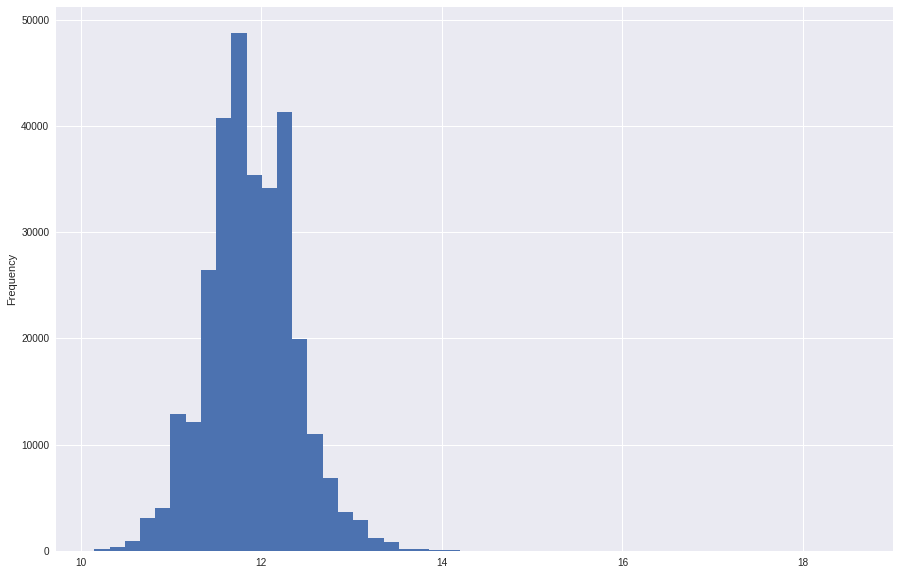

In [0]:
#Definición de una función lamda

data.AMT_INCOME_TOTAL.apply(lambda x: np.log1p(x)).plot.hist(bins=50)

In [0]:
data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [0]:
#Creación de un dict para hacer encoding
Code_Gener={'F':0,'M':1,'XNA':-1}

In [0]:
#Encoding de categorias
data.CODE_GENDER.map(Code_Gener).value_counts()

 0    202448
 1    105059
-1         4
Name: CODE_GENDER, dtype: int64

### Análisis 2

El objetivo es no trabajar con todas las variables, explorar las propiedades de cada una de las variables y su relación entre ellas.

In [0]:
#Con este ejmplos se tratan de ilustrar algunas de los 
#parámetros de la función read_csv

data2=pd.read_csv("application_train.csv.zip",nrows=10000,usecols=[0,1,2,3,4,5,6,7,8,9,15],dtype={'TARGET':np.int8,'CNT_CHILDREN':np.int8})
data2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_HOUSING_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,House / apartment
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,House / apartment
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,House / apartment
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,House / apartment
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,House / apartment


In [0]:
#Ejemplo de como conocer los parámetros de una función
# o explorar la documentación

?pd.read_csv

In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
SK_ID_CURR            10000 non-null int64
TARGET                10000 non-null int8
NAME_CONTRACT_TYPE    10000 non-null object
CODE_GENDER           10000 non-null object
FLAG_OWN_CAR          10000 non-null object
FLAG_OWN_REALTY       10000 non-null object
CNT_CHILDREN          10000 non-null int8
AMT_INCOME_TOTAL      10000 non-null float64
AMT_CREDIT            10000 non-null float64
AMT_ANNUITY           10000 non-null float64
NAME_HOUSING_TYPE     10000 non-null object
dtypes: float64(3), int64(1), int8(2), object(5)
memory usage: 722.7+ KB


In [0]:
data2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,105831.156800,0.077500,0.416300,1.674489e+05,6.007531e+05,27088.010550
std,3359.349281,0.267397,0.722251,9.422260e+04,4.032643e+05,14384.946154
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000
25%,102915.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16434.000000
50%,105849.500000,0.000000,0.000000,1.440000e+05,5.130000e+05,24970.500000
75%,108745.250000,0.000000,1.000000,2.025000e+05,8.100000e+05,34636.500000
max,111633.000000,1.000000,7.000000,1.935000e+06,2.961000e+06,135936.000000


In [0]:
#Ejemplo del uso de dato Categorical 
pd.Categorical(data2.CODE_GENDER).describe()

,counts,freqs
categories,,
F,6589,0.6589
M,3411,0.3411


In [0]:
#El uso de la correlation en Pandas

L=data2.iloc[:,data2.columns.str.startswith('AMT')].corr()
data2.iloc[:,data2.columns.str.startswith('AMT')].corr()



,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
AMT_INCOME_TOTAL,1.000000,0.391627,0.458479
AMT_CREDIT,0.391627,1.000000,0.785932
AMT_ANNUITY,0.458479,0.785932,1.000000


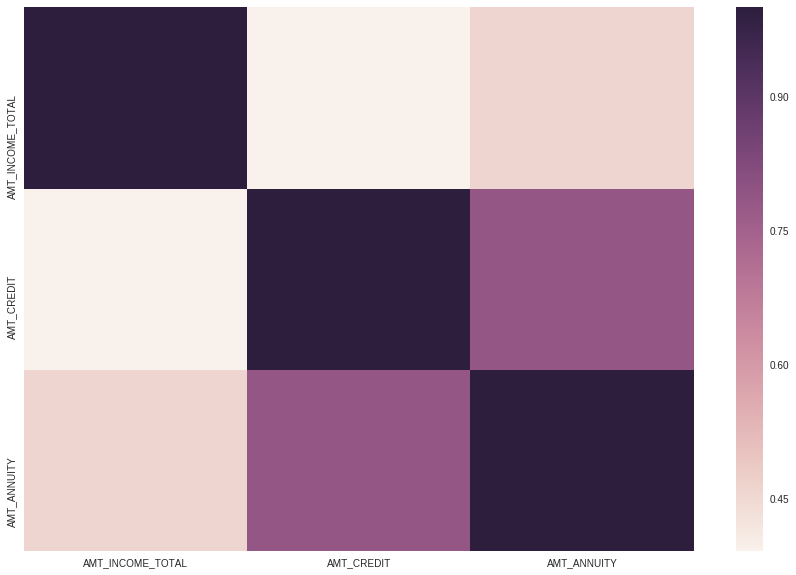

In [0]:
#Muestra gráfica de las relaciones entre la correlación 
#de las variables
sns.heatmap(L)

## Notas finales:

Las Series y los DataFrames pueden ser creados desde ciertas estructuras de datos o colecciones de Python, pero en el trabajo estándar son creados desde alguna base o archivo.

Pandas permite mantener el tipo de programación estandar en Python, más aún permite hacer programación Declarativa esto en buena medida por el modo en que están definidas los métodos sobre las Series y DF.

La carga de datos, requiere conocer algunas de las funciones para cargar los diferentes tipos de archivos. Por default Pandas asigna un tipo de dato a cada columna de un DF, pero lo recomendable es explorar cual tipo de dato es más adecuado y definir el tipo de dato, esto para hacer mejor uso de la memoria.

## Referencias y Créditos:

Libros:

* [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)
* [Data Science from Scratch: First Principles with Python](https://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X)
* [Python Data Science Handbook: Essential Tools for Working with Data](https://www.amazon.com/Python-Data-Science-Handbook-Essential/dp/1491912057)

Sitios Web:

*  [Mini tutotial de la página oficial](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Sobre la programación Declarativa en Python](https://www.benfrederickson.com/python-as-a-declarative-programming-language/)
* [Más sobre Declarative programming](https://nullp0tr.com/pages/declarative_apis.html)

* [Much more sobre Declarive programming](https://florianwilhelm.info/2017/07/declarative_thinking_and_programming/)